## Importing libraries

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
np.random.seed(7)

## Loading dataset and examining

In [ ]:
penguins = sns.load_dataset('penguins')

### Exploring dataset

In [ ]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


- **species**: Penguin species
- **island**: place where that Penguin live in
- **bill_length_mm**: Lenngth of bill of the Penguin (mm)
- **bill_depth_mm**: Depth of bill of the Penguin (mm)
- **flipper_length_mm**: Length of flipper
- **body_mass_g**: Weight of the Penguin
- **sex**: Gender of the Penguin

In [ ]:
penguins.columns = ['species', 'island', 'bill_length', 'bill_depth', 'flipper_length', 'body_mass', 'sex']
penguins.head()

,species,island,bill_length,bill_depth,flipper_length,body_mass,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species         344 non-null    object 
 1   island          344 non-null    object 
 2   bill_length     342 non-null    float64
 3   bill_depth      342 non-null    float64
 4   flipper_length  342 non-null    float64
 5   body_mass       342 non-null    float64
 6   sex             333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


- Dataset contain 344 rows and 7 columns
- Except species column and island column, there are missing values in the other columns.

### Handling missing values

In [ ]:
penguins.isnull().sum()

species            0
island             0
bill_length        2
bill_depth         2
flipper_length     2
body_mass          2
sex               11
dtype: int64

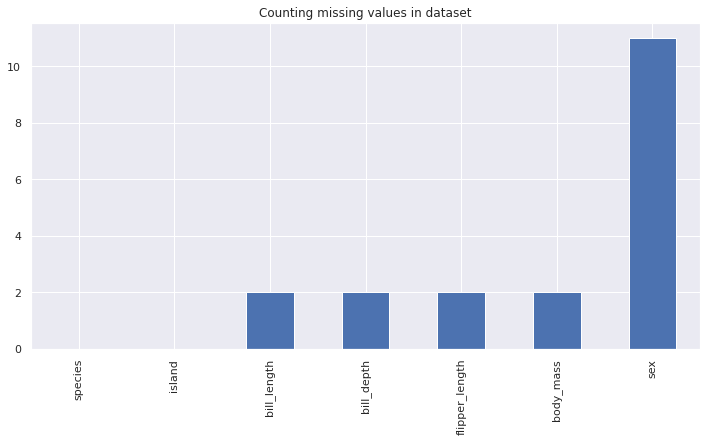

In [ ]:
plt.figure(figsize=(12, 6))
nan_count = penguins.isnull().sum()
nan_count.plot.bar()
plt.title('Counting missing values in dataset')
plt.show()

Replace missing numerical values with mean

In [ ]:
penguins = penguins.fillna(value=penguins.mean())

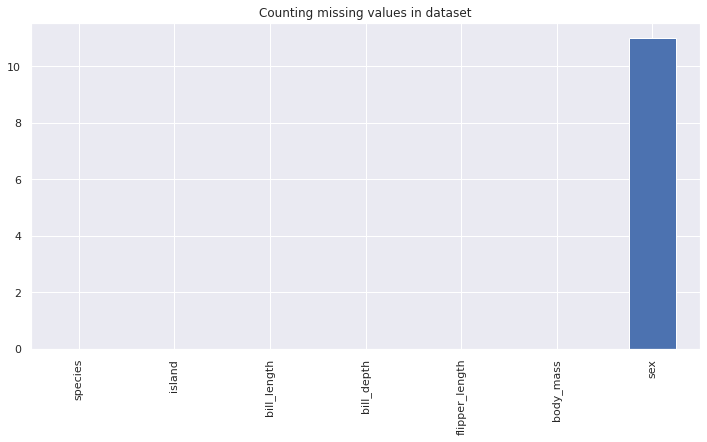

In [ ]:
plt.figure(figsize=(12, 6))
nan_count = penguins.isnull().sum()
nan_count.plot.bar()
plt.title('Counting missing values in dataset')
plt.show()

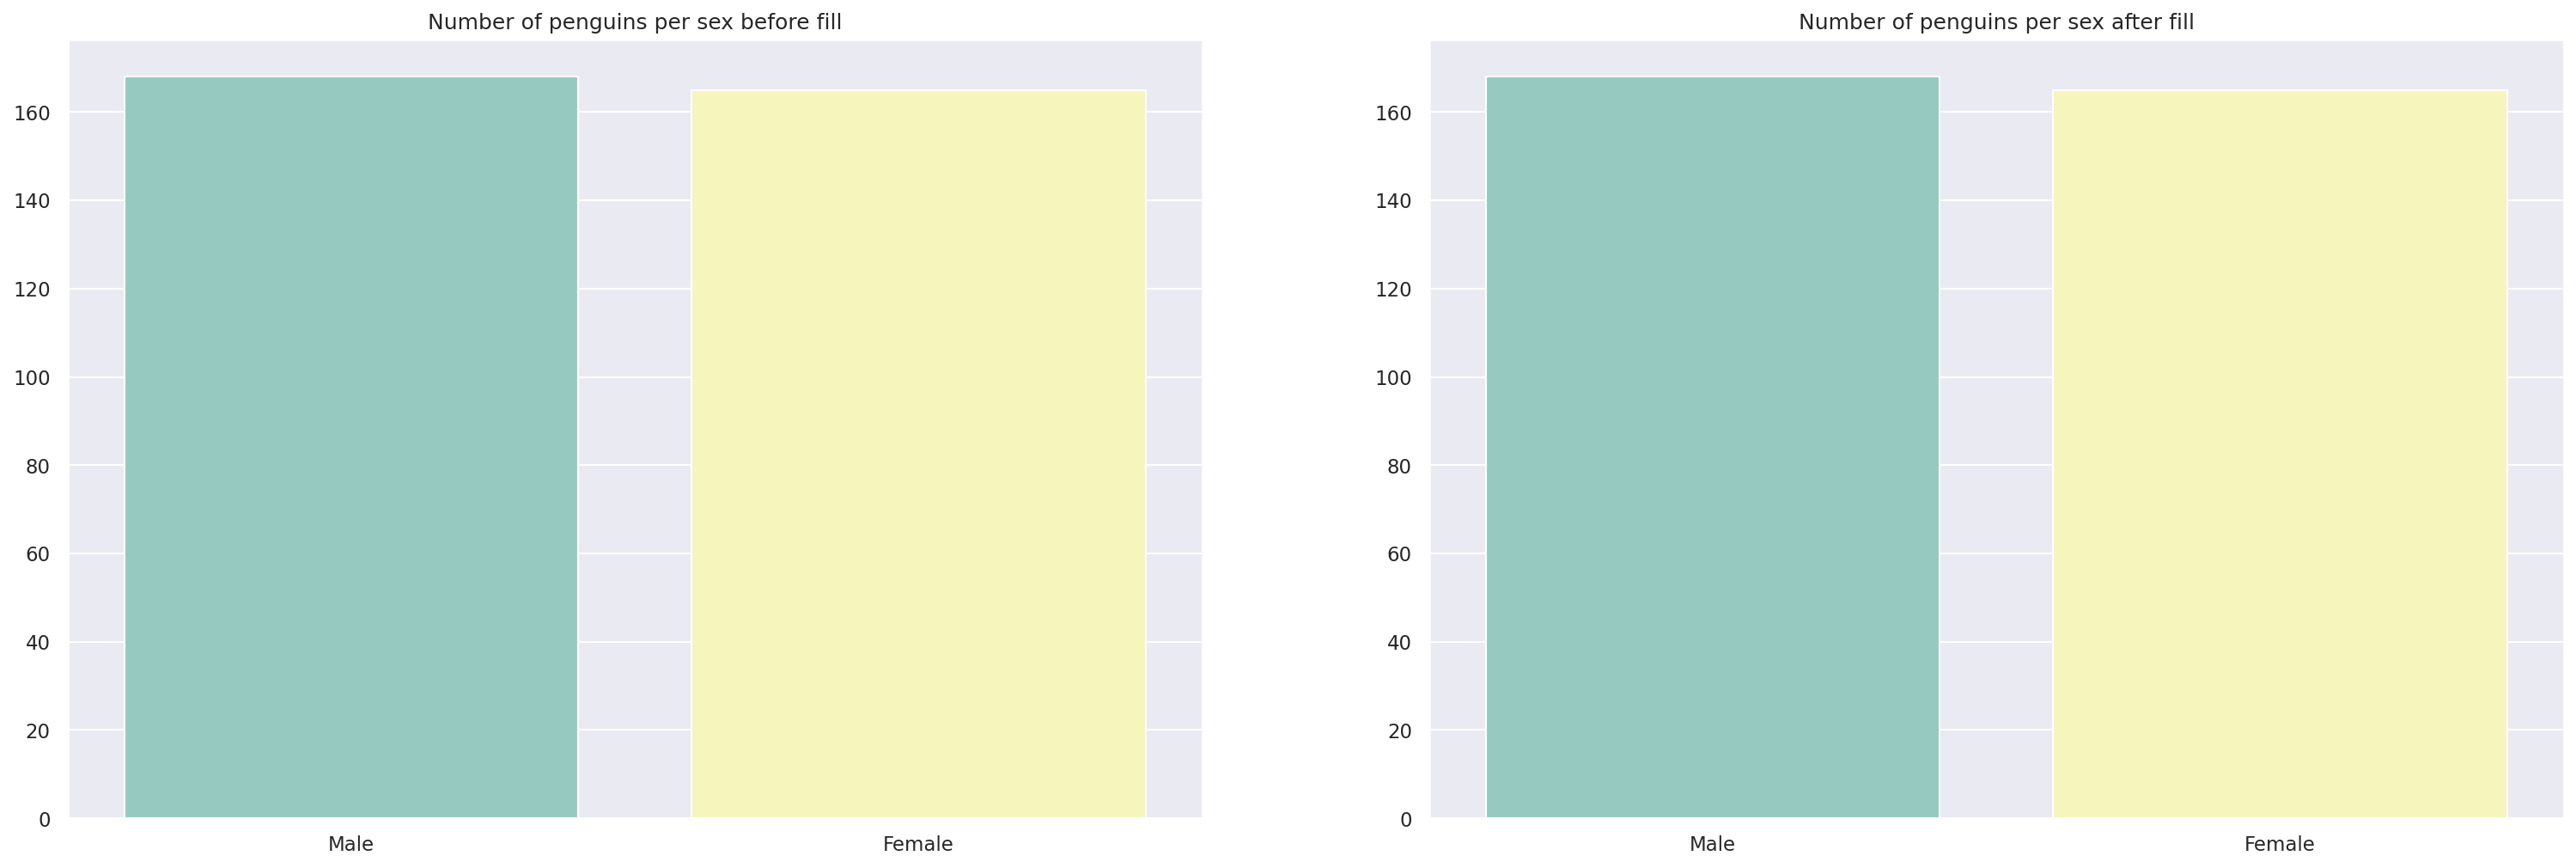

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(25, 8), dpi = 150)

sns.countplot(ax = ax[0],data=penguins, x='sex', palette='Set3')
ax[0].set_title('Number of penguins per sex before fill')
ax[0].set_xlabel('')
ax[0].set_ylabel('')

penguins2 = penguins
penguins2['sex'].fillna(method='bfill', axis=0)

sns.countplot(ax = ax[1],data=penguins2, x='sex', palette='Set3')
ax[1].set_title('Number of penguins per sex after fill')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
plt.show()

The differences between them seem to not change much. We can fill the missing values with the value right below it.

Confirm Replacing missing value in column 'sex' with bfill

In [ ]:
penguins['sex'].fillna(method='bfill', axis=0)

0        Male
1      Female
2      Female
3      Female
4      Female
        ...  
339    Female
340    Female
341      Male
342    Female
343      Male
Name: sex, Length: 344, dtype: object

Done!!!!

In [ ]:
penguins['sex'] = penguins['sex'].fillna('Female')
penguins.isnull().sum()

species           0
island            0
bill_length       0
bill_depth        0
flipper_length    0
body_mass         0
sex               0
dtype: int64

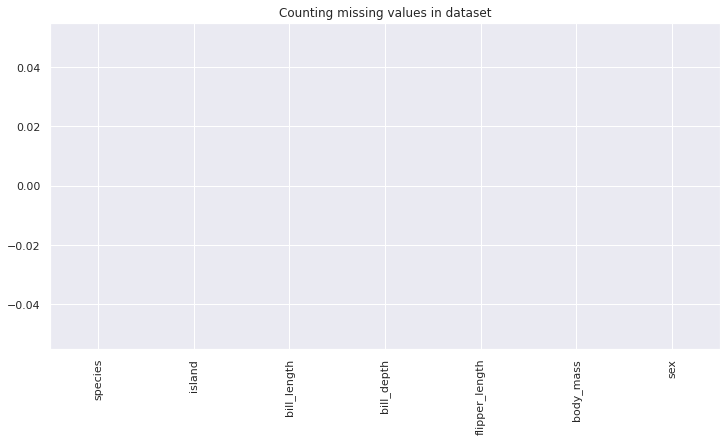

In [ ]:
plt.figure(figsize=(12, 6))
nan_count = penguins.isnull().sum()
nan_count.plot.bar()
plt.title('Counting missing values in dataset')
plt.show()

## Exploring dataset

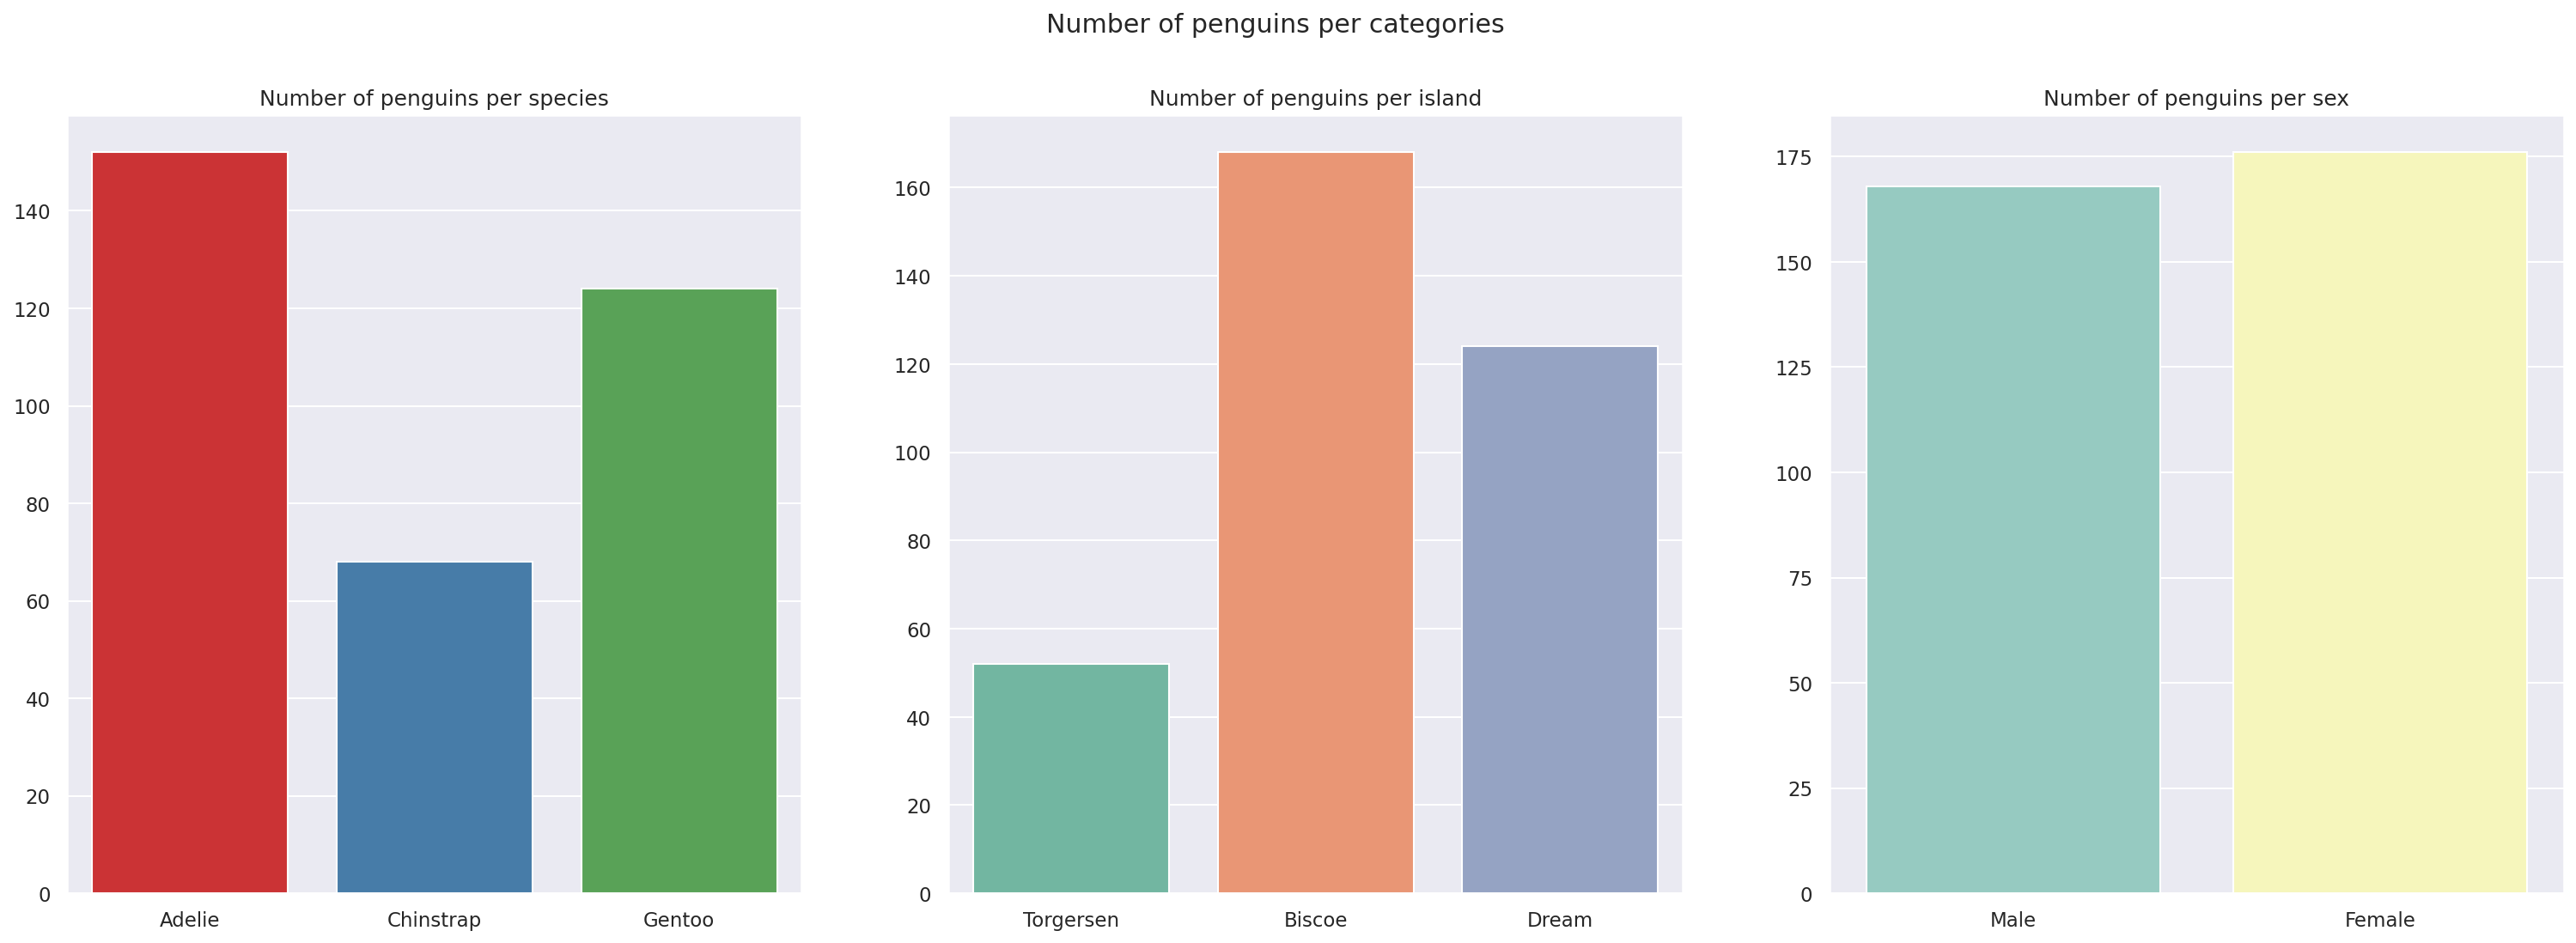

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25, 8), dpi = 150)

sns.countplot(ax = ax[0],data=penguins, x='species', palette='Set1')
ax[0].set_title('Number of penguins per species')
ax[0].set_xlabel('')
ax[0].set_ylabel('')

sns.countplot(ax = ax[1],data=penguins, x='island', palette='Set2')
ax[1].set_title('Number of penguins per island')
ax[1].set_xlabel('')
ax[1].set_ylabel('')

sns.countplot(ax = ax[2],data=penguins, x='sex', palette='Set3')
ax[2].set_title('Number of penguins per sex')
ax[2].set_xlabel('')
ax[2].set_ylabel('')

plt.suptitle('Number of penguins per categories')
plt.show()



*   The graph of numbers per species show that most penguins is Adelie. 
*   The graph of numbers per island shows that most penguins live in Biscode island.
*   The graph of number per sex show that there is a equaly in number of peguins per sex because two column has nearly equal high




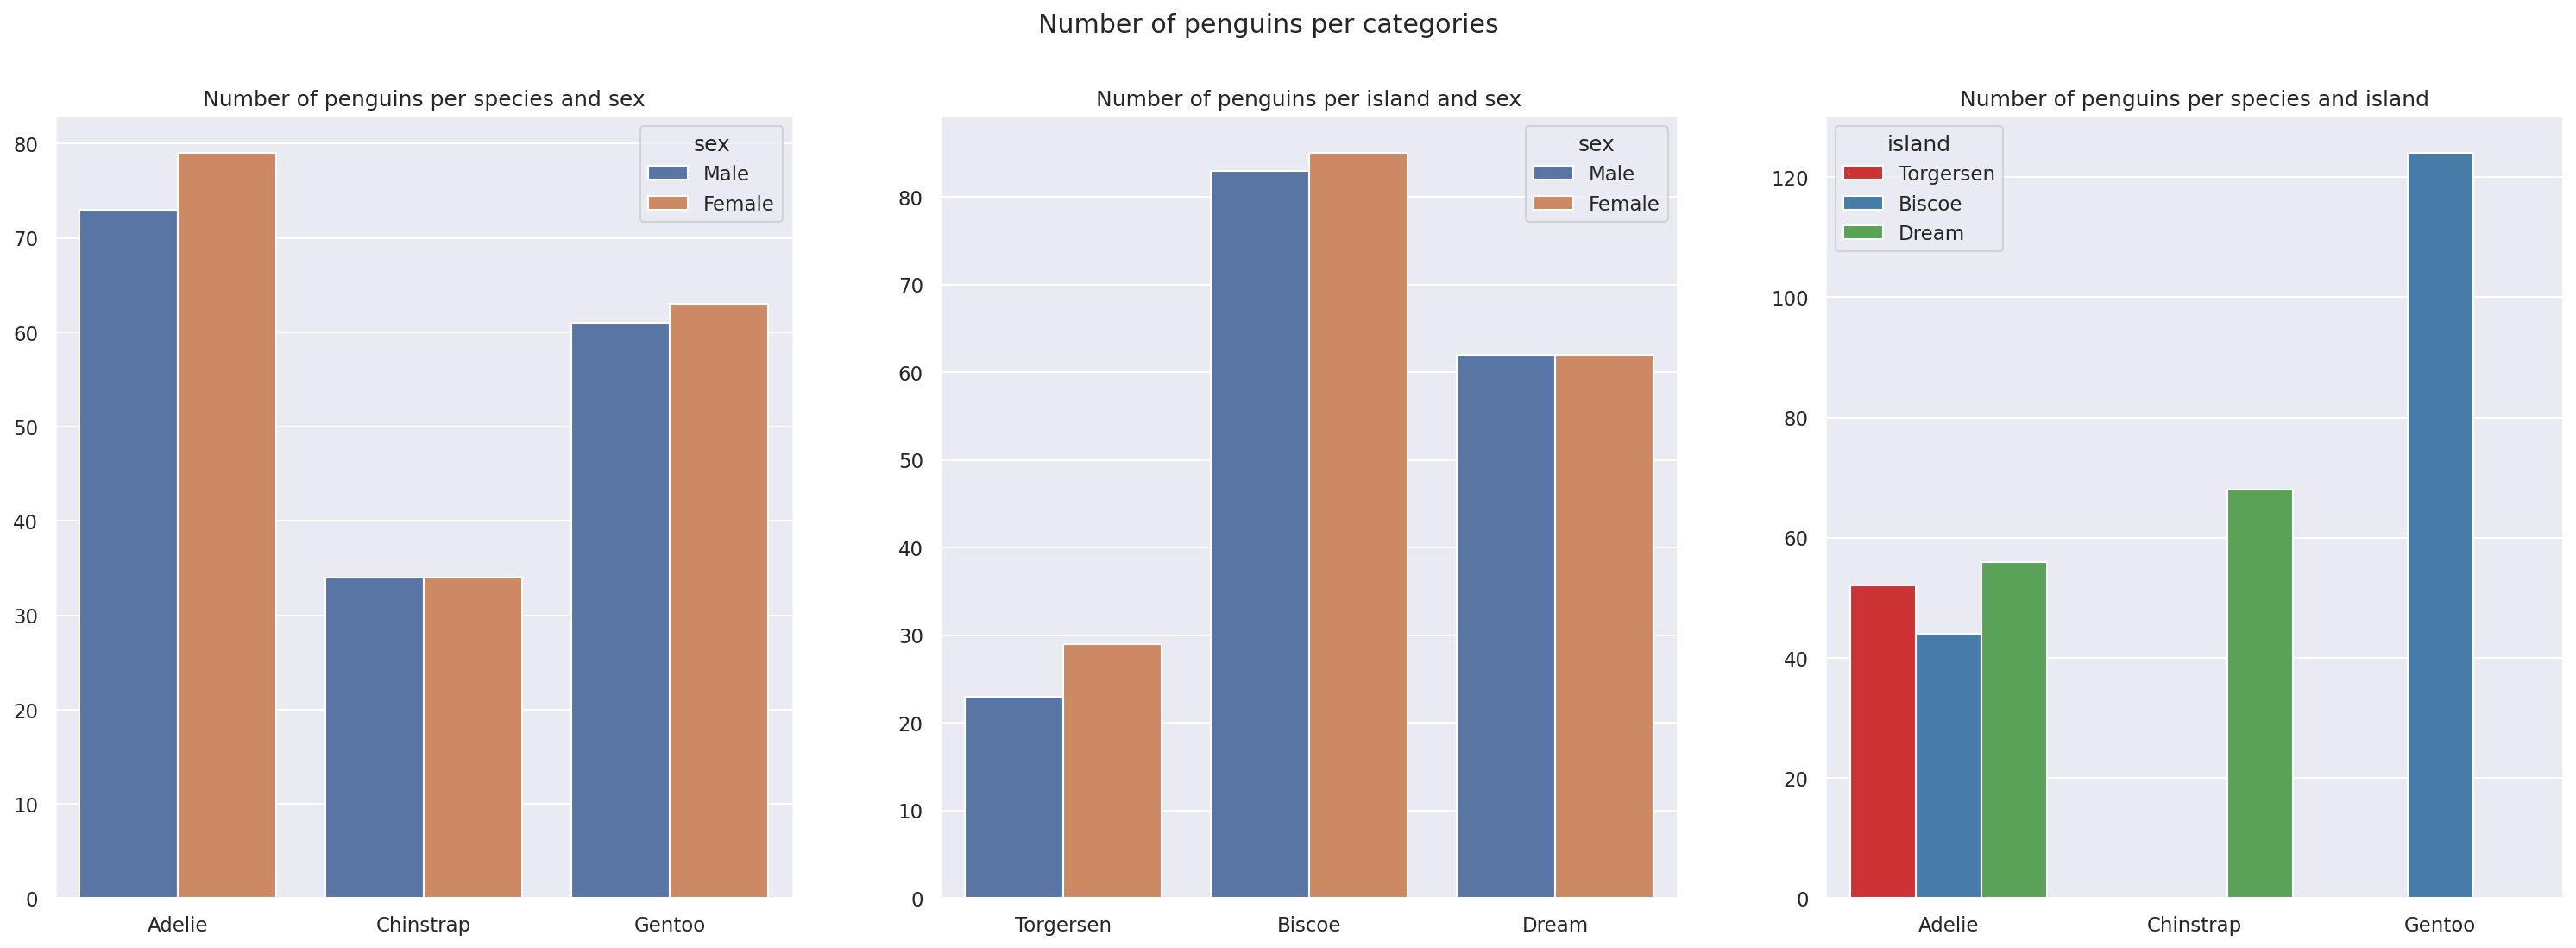

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25, 8), dpi = 150)

sns.countplot(ax = ax[0],data=penguins, x='species', hue='sex')
ax[0].set_title('Number of penguins per species and sex')
ax[0].set_xlabel('')
ax[0].set_ylabel('')

sns.countplot(ax = ax[1],data=penguins, x='island', hue='sex')
ax[1].set_title('Number of penguins per island and sex')
ax[1].set_xlabel('')
ax[1].set_ylabel('')

sns.countplot(ax = ax[2],data=penguins, x='species', hue='island', palette='Set1')
ax[2].set_title('Number of penguins per species and island')
ax[2].set_xlabel('')
ax[2].set_ylabel('')

plt.suptitle('Number of penguins per categories')
plt.show()



*   In two graphs of species and island, all pairs of columns are nearly equal. This mean the number of penguins in these categorical don't have much differences
*   However, the right most graphs has more information. Because there are three columns in Adelie, it show that the Adelies live in all three island given in dataset.
*   In addition, since there is only one column in Chinstrap, this shows that the Chinstraps only live in Dream island. Similarly, the Gentoos only live in Biscoe island
*   These can be important informations to distinguish between penguins



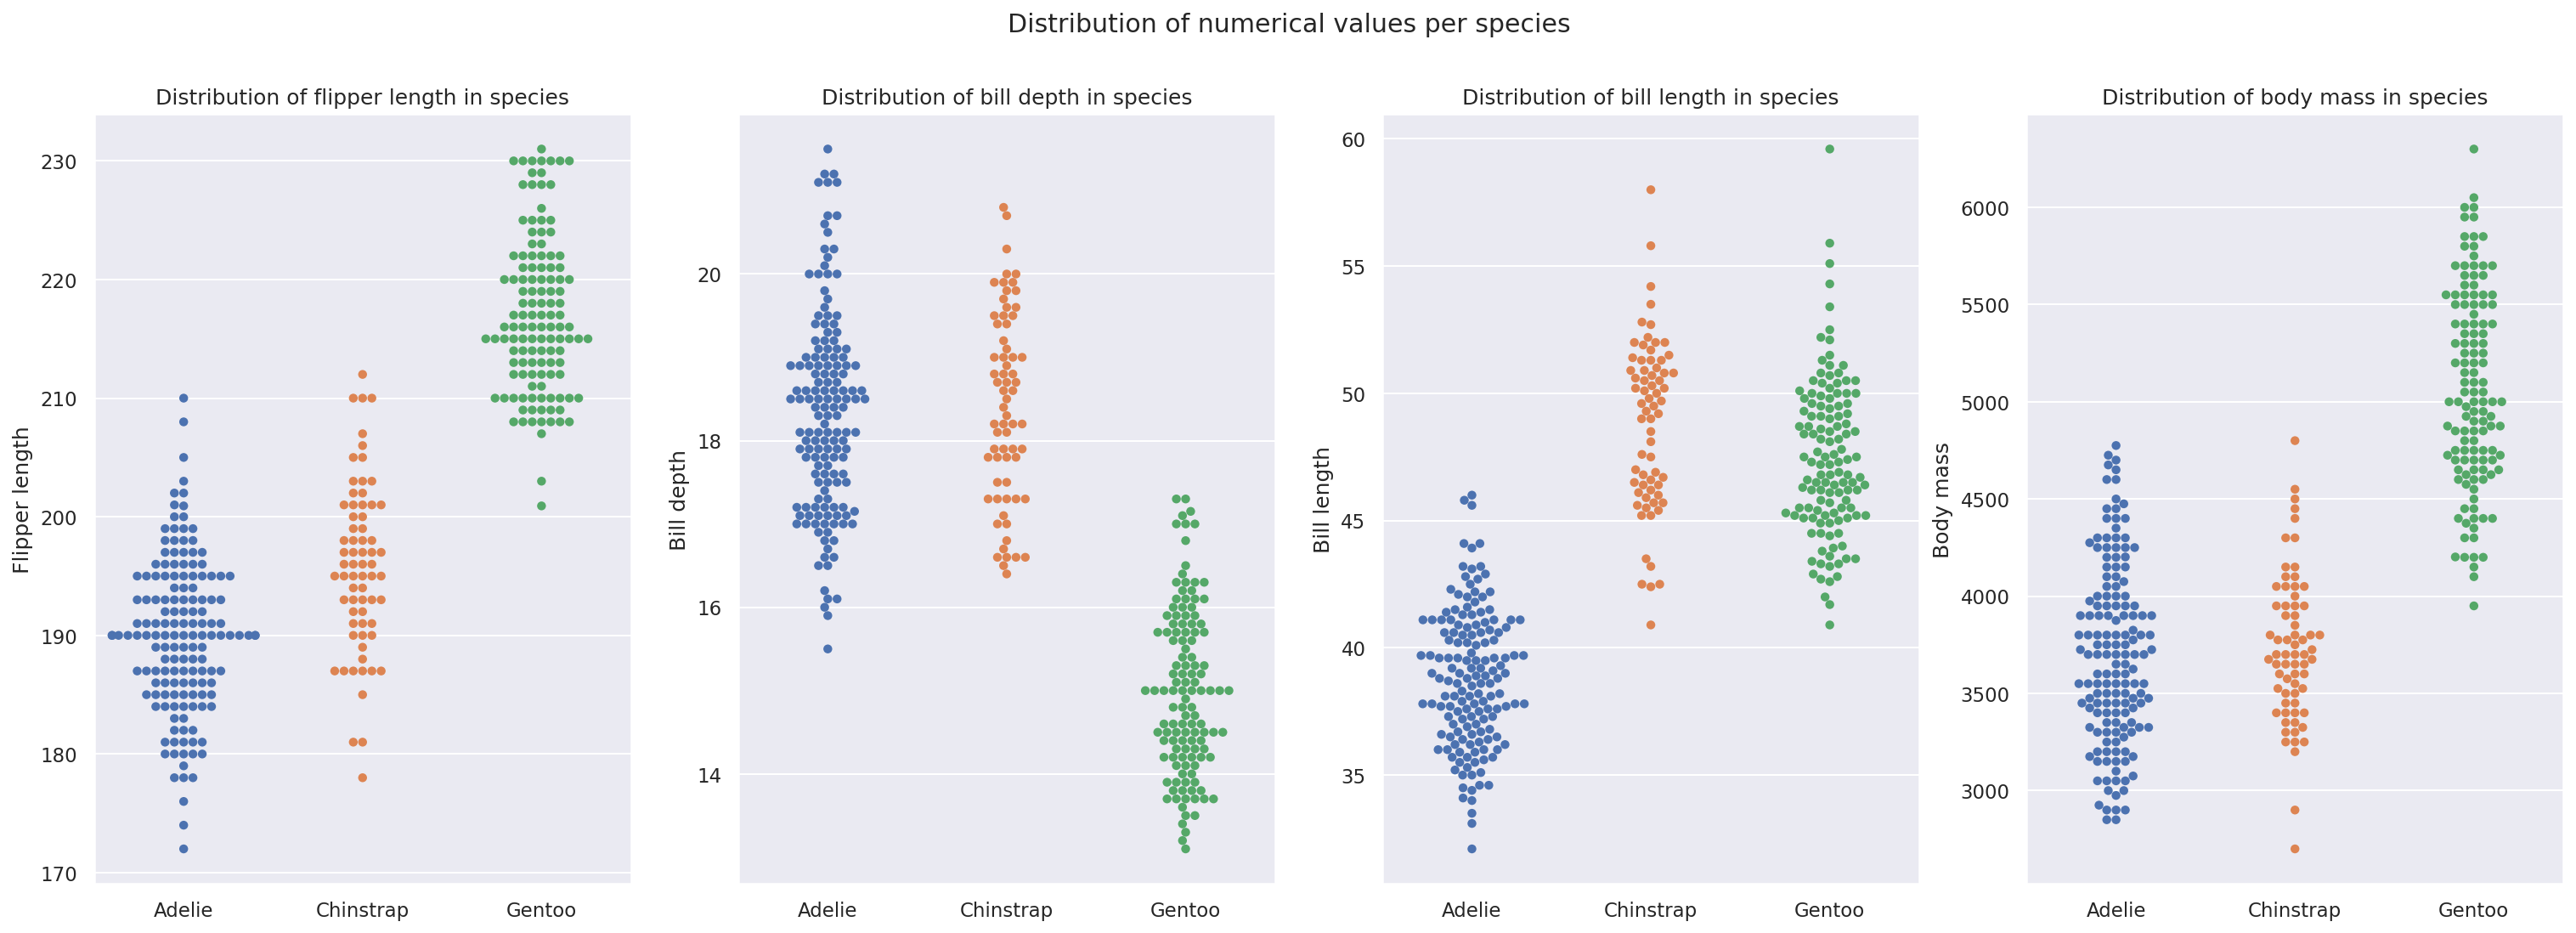

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(25, 8), dpi=150)

sns.swarmplot(ax = ax[0],data=penguins, x='species', y='flipper_length')
ax[0].set_title('Distribution of flipper length in species')
ax[0].set_xlabel('')
ax[0].set_ylabel('Flipper length')

sns.swarmplot(ax = ax[1],data=penguins, x='species', y='bill_depth')
ax[1].set_title('Distribution of bill depth in species')
ax[1].set_xlabel('')
ax[1].set_ylabel('Bill depth')

sns.swarmplot(ax = ax[2],data=penguins, x='species', y='bill_length')
ax[2].set_title('Distribution of bill length in species')
ax[2].set_xlabel('')
ax[2].set_ylabel('Bill length')

sns.swarmplot(ax = ax[3],data=penguins, x='species', y='body_mass')
ax[3].set_title('Distribution of body mass in species')
ax[3].set_xlabel('')
ax[3].set_ylabel('Body mass')

plt.suptitle('Distribution of numerical values per species')
plt.show()

 
 
*   The leftmost and rightmost graphs show that the Gentoos have both flipper length and body mass bigger than the others. However, the Bill depth graph shows that they have smaller bill depth than the rest.
*   Meanwhile, the Adelies have the smallest bill length
 

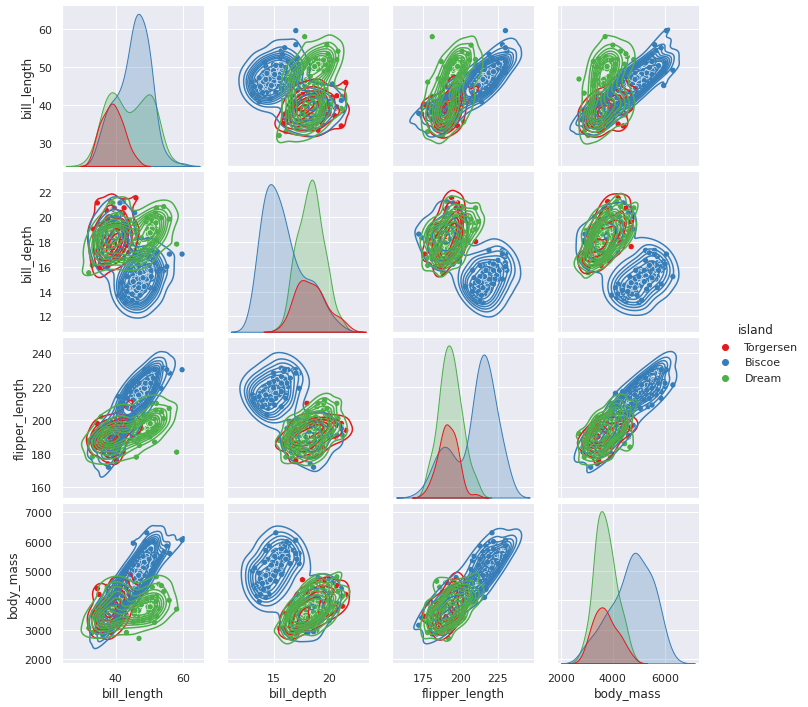

In [ ]:
pp = sns.pairplot(data=penguins, palette='Set1', hue='island')
pp.map_lower(sns.kdeplot)
pp.map_upper(sns.kdeplot)
plt.show()



*   There are clearly differences in body parameter between penguins live in Biscoe island and the others when all value tend to stay in differences groups



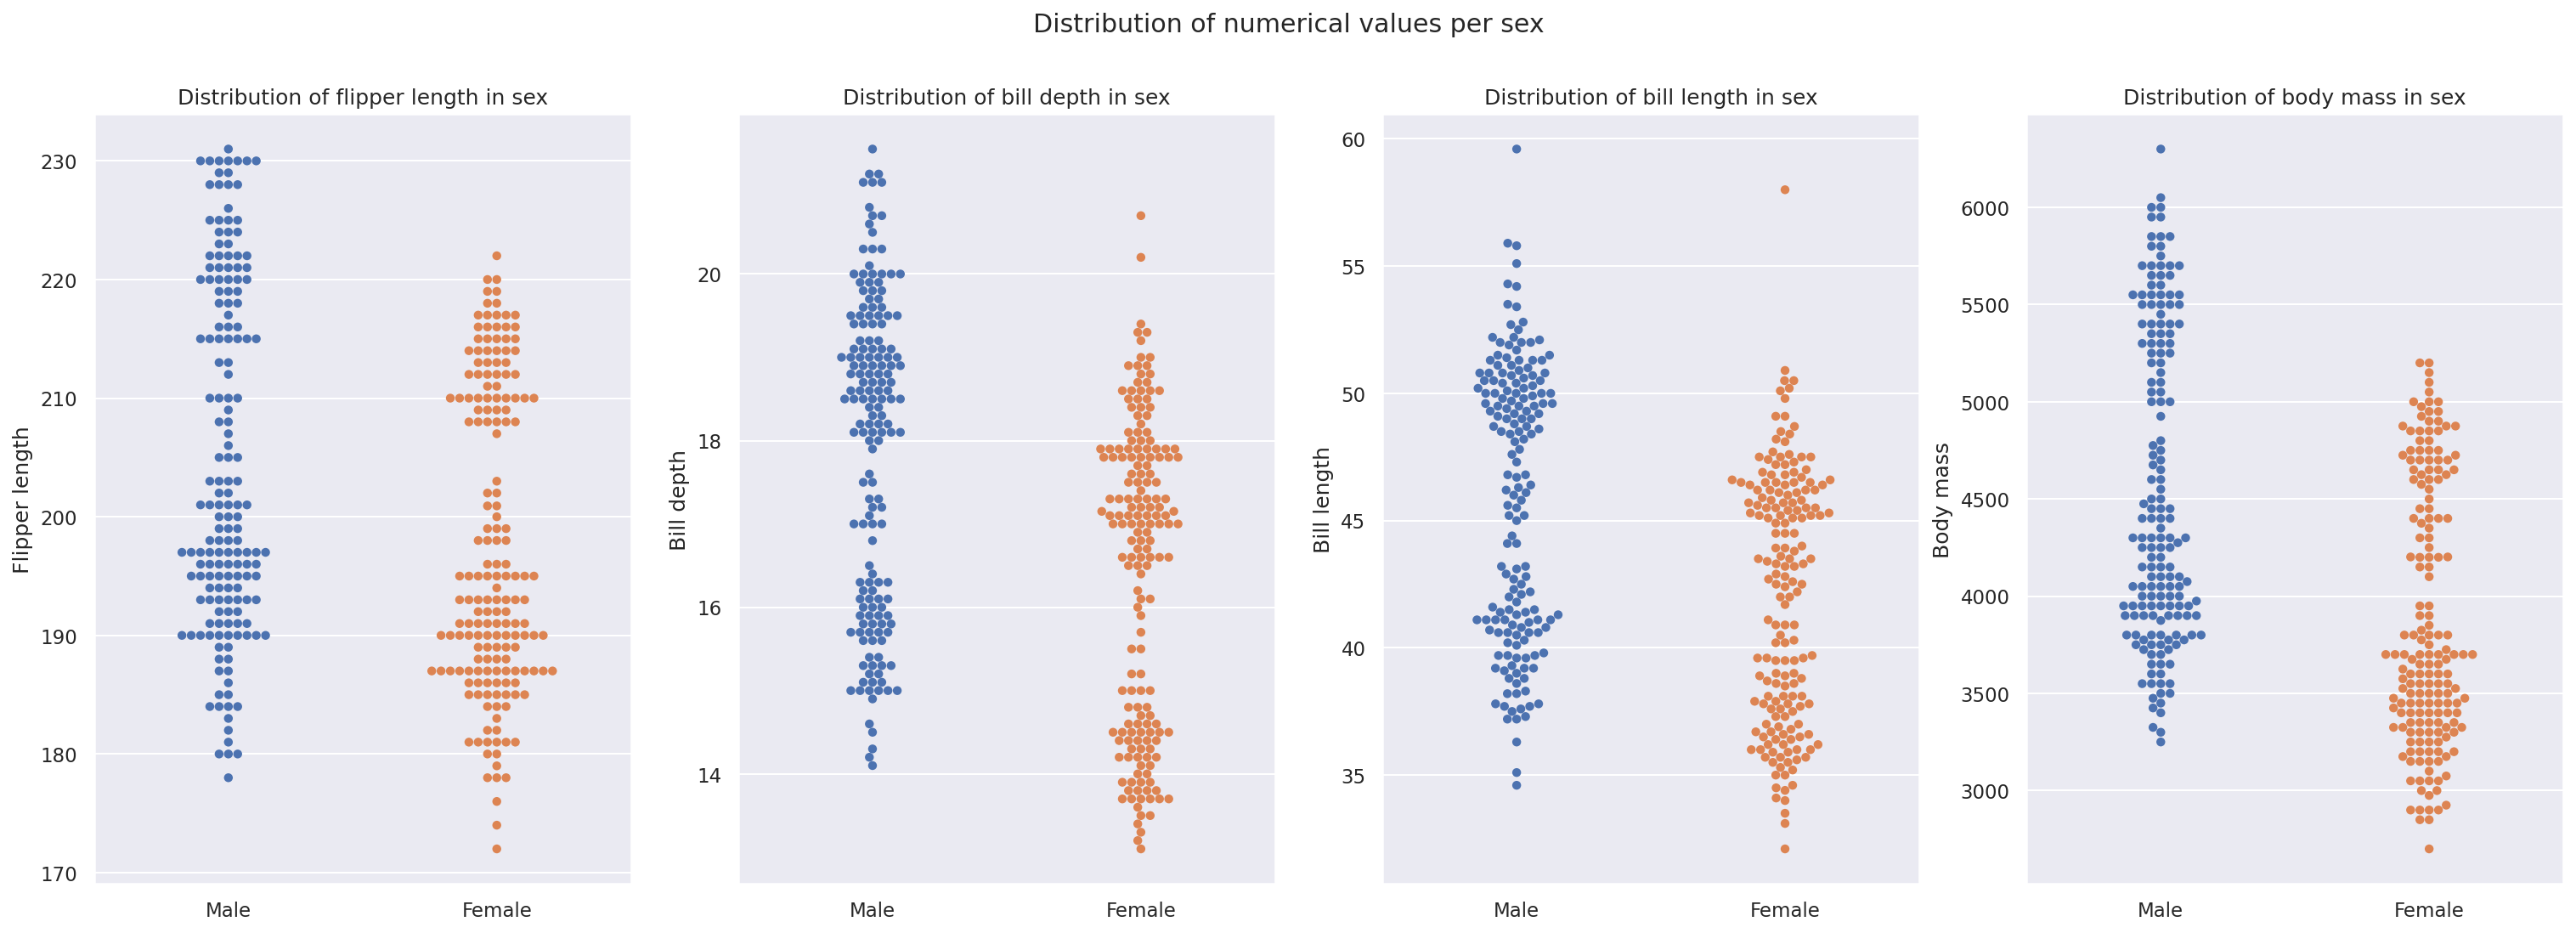

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(25, 8), dpi=150)

sns.swarmplot(ax = ax[0],data=penguins, x='sex', y='flipper_length')
ax[0].set_title('Distribution of flipper length in sex')
ax[0].set_xlabel('')
ax[0].set_ylabel('Flipper length')

sns.swarmplot(ax = ax[1],data=penguins, x='sex', y='bill_depth')
ax[1].set_title('Distribution of bill depth in sex')
ax[1].set_xlabel('')
ax[1].set_ylabel('Bill depth')

sns.swarmplot(ax = ax[2],data=penguins, x='sex', y='bill_length')
ax[2].set_title('Distribution of bill length in sex')
ax[2].set_xlabel('')
ax[2].set_ylabel('Bill length')

sns.swarmplot(ax = ax[3],data=penguins, x='sex', y='body_mass')
ax[3].set_title('Distribution of body mass in sex')
ax[3].set_xlabel('')
ax[3].set_ylabel('Body mass')

plt.suptitle('Distribution of numerical values per sex')
plt.show()



*   Male penguins have every thing bigger than Female penguins because their distributions higher than those of Female penguins



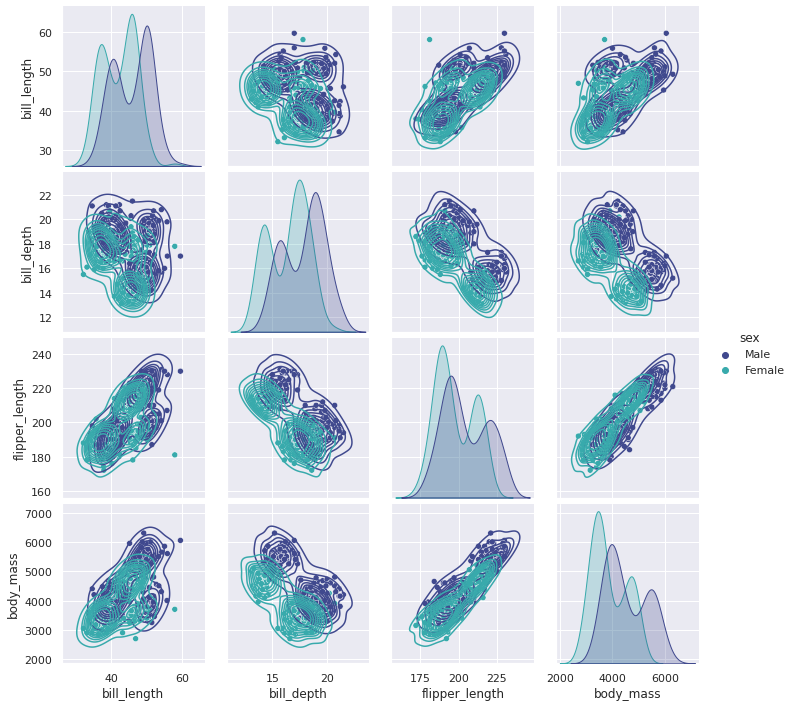

In [ ]:
pp = sns.pairplot(data=penguins, palette='mako', hue='sex')
pp.map_lower(sns.kdeplot)
pp.map_upper(sns.kdeplot)


*   These graph show us more parental informations we saw before.



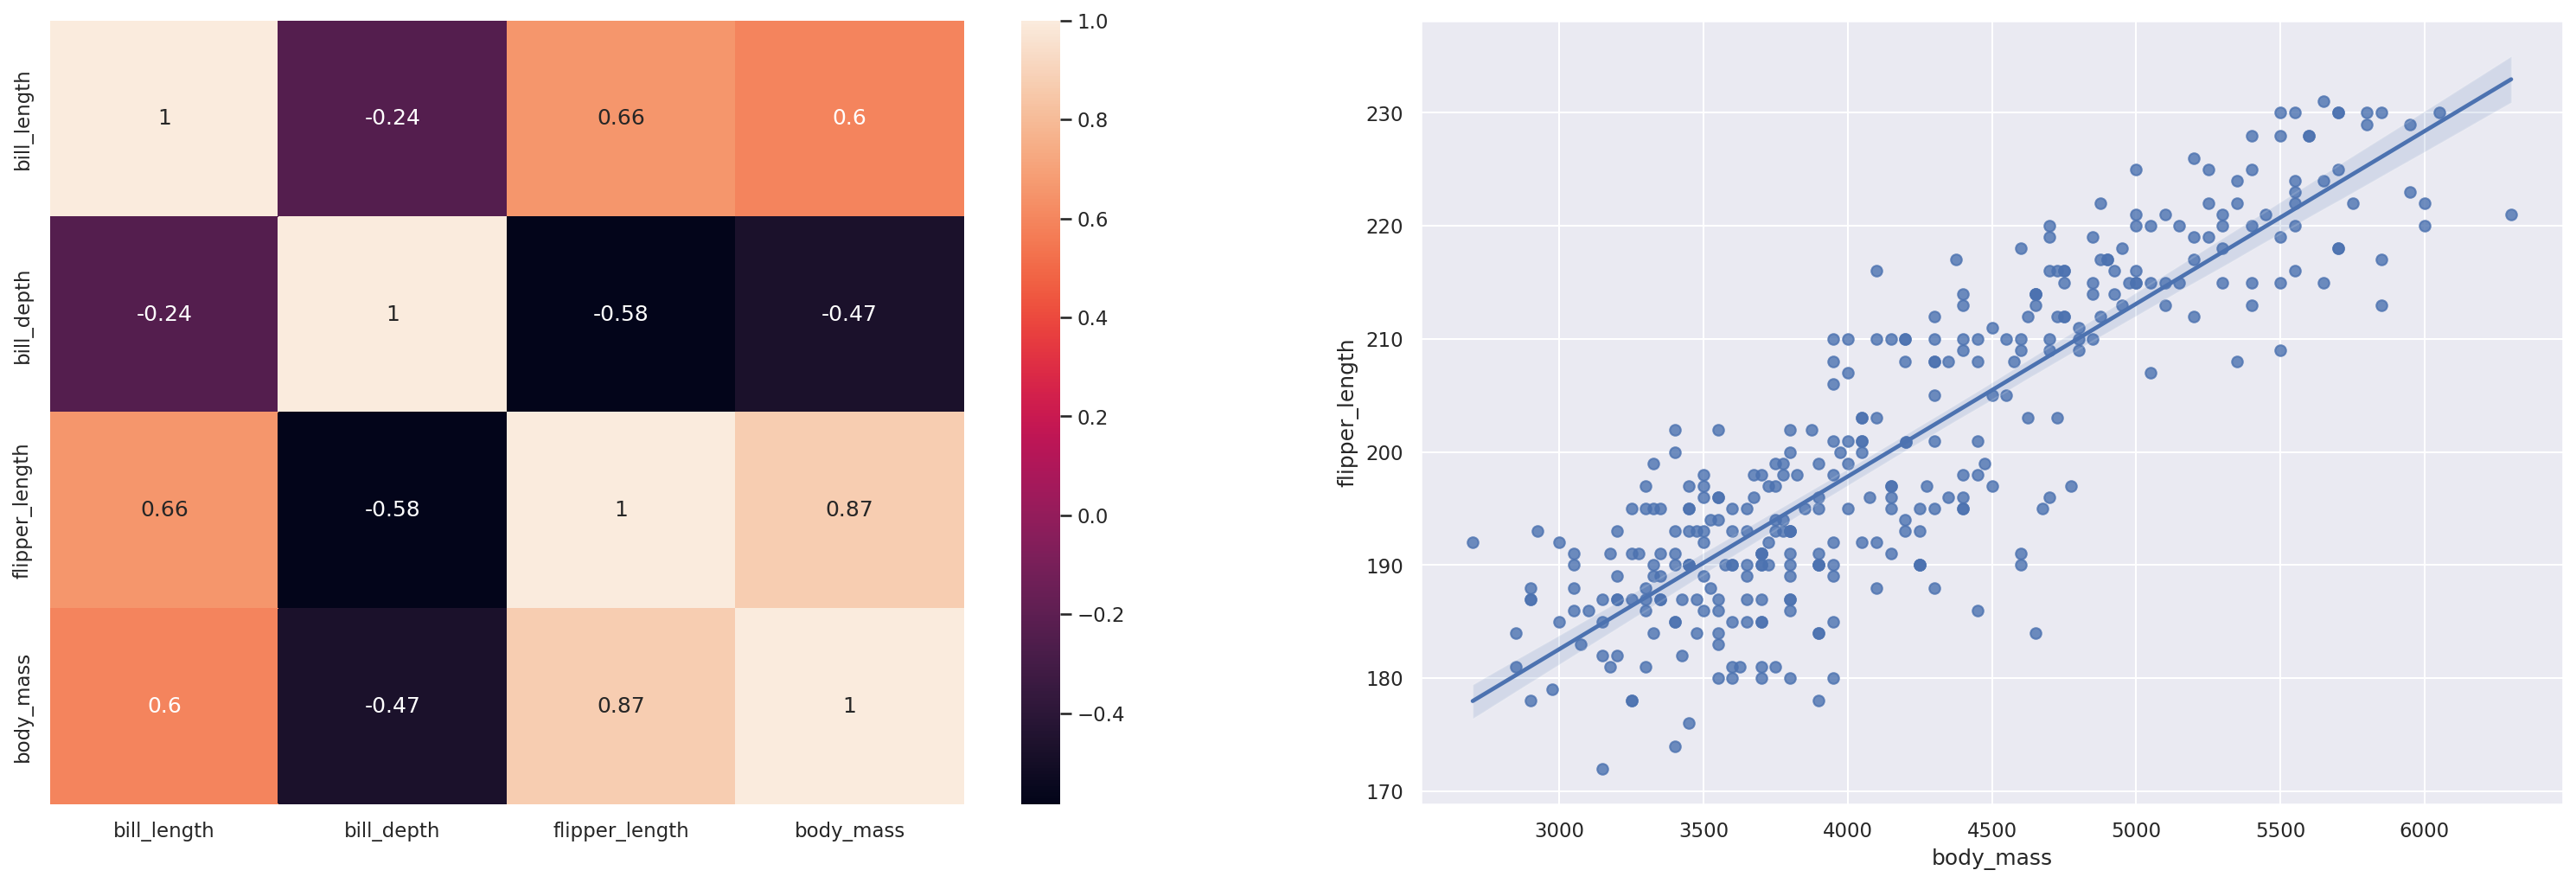

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(25, 8), dpi=150)
sns.heatmap(ax=ax[0], data=penguins.corr(), annot=True)
sns.regplot(ax=ax[1], x=penguins['body_mass'], y=penguins['flipper_length'])
plt.show()



*   Flipper length and body mass of penguins have the highest correlation up to 0.87
*   All most numerical values in this dataset have strong correlation with each others





*   This dataset has balanced information about species of penguins. Most numerical values have strong correlation with each other. There is a lot of categorical information that can be very useful for classification problems or regression problems.



## Species classification

### Get train set and test set

In [ ]:
dataset = penguins
dataset.head()

,species,island,bill_length,bill_depth,flipper_length,body_mass,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,Female
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female


In [ ]:
X = dataset.iloc[:, 1:]
X.head()

,island,bill_length,bill_depth,flipper_length,body_mass,sex
0,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Torgersen,43.92193,17.15117,200.915205,4201.754386,Female
4,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female


In [ ]:
Y = dataset.iloc[:, 0]
Y

0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
339    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 344, dtype: object

### Transforming categorical features

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = ct.fit_transform(X)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, -1] = le.fit_transform(X[:, -1])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

### Train test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=7)

### Build model

In [ ]:
tree = DecisionTreeClassifier(max_depth=2)
model = tree.fit(X_train, Y_train)

### Visualize the tree

In [ ]:
text_representation = sklearn.tree.export_text(model)
print(text_representation)

|--- feature_3 <= 42.35
|   |--- feature_4 <= 15.10
|   |   |--- class: 2
|   |--- feature_4 >  15.10
|   |   |--- class: 0
|--- feature_3 >  42.35
|   |--- feature_0 <= 0.50
|   |   |--- class: 1
|   |--- feature_0 >  0.50
|   |   |--- class: 2



### Visualize the result

In [ ]:
Y_train_predict = model.predict(X_train)
Y_test_predict = model.predict(X_test)

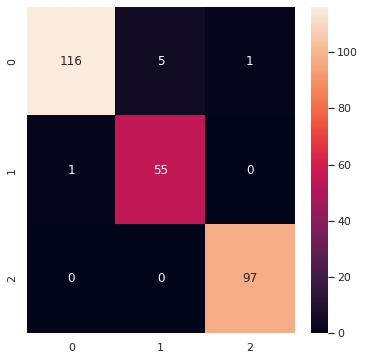

In [ ]:
mt = confusion_matrix(Y_train, Y_train_predict)
plt.figure(figsize=(6, 6))
sns.heatmap(mt, annot=True, fmt='d')
plt.show()

### Measure the accuracy

In [ ]:
from sklearn.metrics import accuracy_score
print("Train accuracy: ", accuracy_score(Y_train, Y_train_predict))
print("Test accuracy: ", accuracy_score(Y_test, Y_test_predict))

Train accuracy:  0.9745454545454545
Test accuracy:  0.8985507246376812


## Test with differences maxdepth

In [ ]:
df = pd.DataFrame({'TRAIN_BEST':[], 
                   'TEST_BEST':[],
                   'TRAIN_RANDOM':[],
                   'TEST_RANDOM':[]})
df.loc[0] = [None, None, None, None]
df

,TRAIN_BEST,TEST_BEST,TRAIN_RANDOM,TEST_RANDOM
0,None,None,None,None


In [ ]:
for i in range(1, 30):
    print("Running maxdepth = ", i)
    tree = DecisionTreeClassifier(max_depth=i, splitter='best')
    model = tree.fit(X_train, Y_train)

    Y_train_predict = model.predict(X_train)
    Y_test_predict = model.predict(X_test)

    tree2 = DecisionTreeClassifier(max_depth=i, splitter='random')
    model2 = tree2.fit(X_train, Y_train)

    Y_train_predict2 = model2.predict(X_train)
    Y_test_predict2 = model2.predict(X_test)

    df.loc[df.shape[0]] = [accuracy_score(Y_train, Y_train_predict), accuracy_score(Y_test, Y_test_predict), 
                           accuracy_score(Y_train, Y_train_predict2), accuracy_score(Y_test, Y_test_predict2)]



Running maxdepth =  1
Running maxdepth =  2
Running maxdepth =  3
Running maxdepth =  4
Running maxdepth =  5
Running maxdepth =  6
Running maxdepth =  7
Running maxdepth =  8
Running maxdepth =  9
Running maxdepth =  10
Running maxdepth =  11
Running maxdepth =  12
Running maxdepth =  13
Running maxdepth =  14
Running maxdepth =  15
Running maxdepth =  16
Running maxdepth =  17
Running maxdepth =  18
Running maxdepth =  19
Running maxdepth =  20
Running maxdepth =  21
Running maxdepth =  22
Running maxdepth =  23
Running maxdepth =  24
Running maxdepth =  25
Running maxdepth =  26
Running maxdepth =  27
Running maxdepth =  28
Running maxdepth =  29


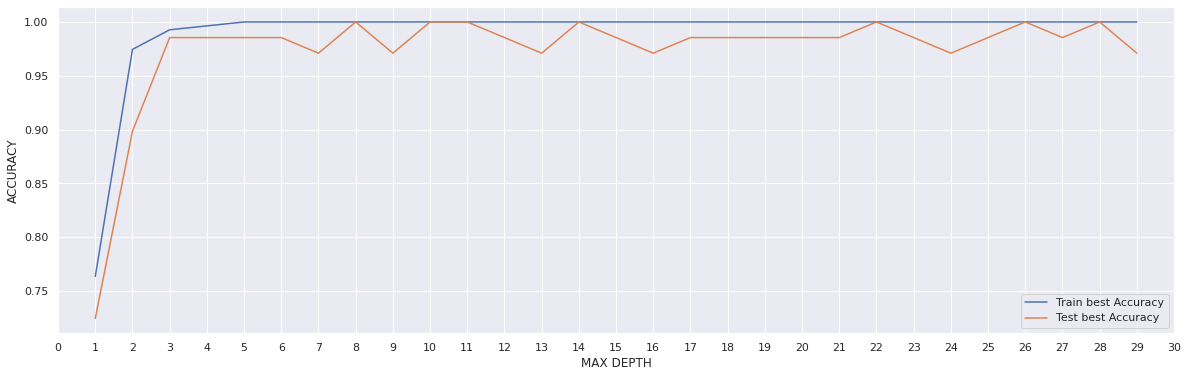

In [ ]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=df, x=df.index, y='TRAIN_BEST', label='Train best Accuracy')
sns.lineplot(data=df, x=df.index, y='TEST_BEST', label='Test best Accuracy')
plt.ylabel('ACCURACY')
plt.xlabel('MAX DEPTH')
plt.xticks(ticks=np.arange(0, 31, 1))
plt.xlim(0, 30)
plt.legend()
plt.show()

According to the chart above, on the training set, increasing the maxdepth also increases the accuracy on the training set because the line rapidly goes up, reaches the maximum and remains stable.
 
However, the best result on the training set does not mean we also get the best result on the test set. We can see in the chart above, at the beginning, when I increase maxdepth from 1 to 4, it also increases the result in the test set. After that the accuracy maintains its stability until the maxdepth reaches 6. From that, the accuracy on the test set fluctuate from about 0.975 to max 1.00. 
 
While the accuracy on the training set reaches and maintains stable at the maximum accuracy, the result on the test set fluctuates and gets the lower result than that of the training set. This can be called overfitting.
 
To conclude, I think the parameter maxdepth has a great influence on our model accuracy because it helps the model fit to the data better. However, this parameter also has its limit because the bigger maxdepth parameter the higher risk of overfitting. 



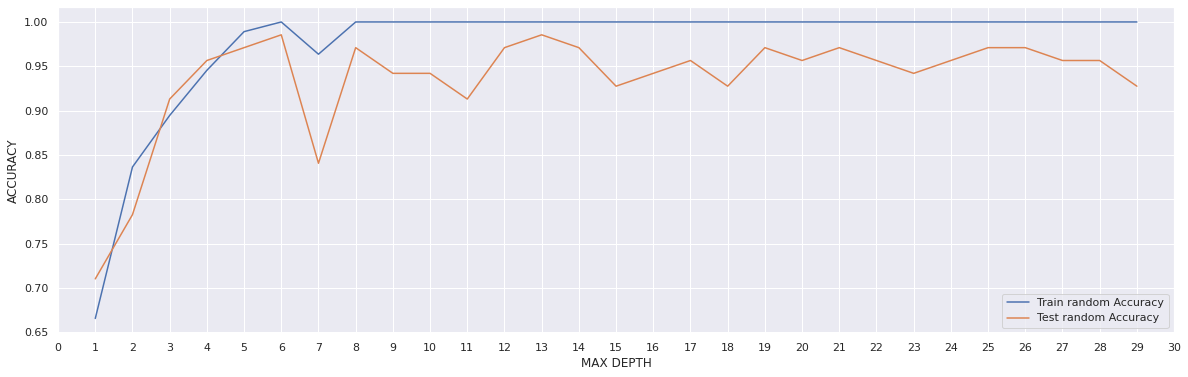

In [ ]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=df, x=df.index, y='TRAIN_RANDOM', label='Train random Accuracy')
sns.lineplot(data=df, x=df.index, y='TEST_RANDOM', label='Test random Accuracy')
plt.ylabel('ACCURACY')
plt.xlabel('MAX DEPTH')
plt.xticks(ticks=np.arange(0, 31, 1))
plt.xlim(0, 30)
plt.legend()
plt.show()

We can see the overfitting more clearly when I set the splitter parameter to 'random' instead of 'best'. This parameter causes the chaos at first, but when maxdepth reaches 8, the accuracy on the training set maintains stable at the maximum but that on the test set does not.

The end. Thanks for reading and hope you the best.